In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Preprocessing ##

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


2024-02-25 18:03:36.094216: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-02-25 18:03:36.094248: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-25 18:03:36.094258: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-25 18:03:36.094474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-25 18:03:36.094815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Validation Image processing ##

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## Building Model ##

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
          
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
          
model.add(Dropout(0.25)) # To Avoid Overfitting

model.add(Flatten())
model.add(Dense(units=1500, activation='relu'))
model.add(Dropout(0.25))
# Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model ##

In [23]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                

## Training Model ##

In [25]:
trianing_history = model.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
2197/2197 [==============================] - 134s 61ms/step - loss: 1.3502 - accuracy: 0.6058 - val_loss: 0.5247 - val_accuracy: 0.8292
Epoch 2/5
2197/2197 [==============================] - 133s 61ms/step - loss: 0.5019 - accuracy: 0.8438 - val_loss: 0.3619 - val_accuracy: 0.8833
Epoch 3/5
2197/2197 [==============================] - 128s 58ms/step - loss: 0.3324 - accuracy: 0.8970 - val_loss: 0.2684 - val_accuracy: 0.9130
Epoch 4/5
2197/2197 [==============================] - 126s 57ms/step - loss: 0.2679 - accuracy: 0.9172 - val_loss: 0.2773 - val_accuracy: 0.9215
Epoch 5/5
2197/2197 [==============================] - 126s 57ms/step - loss: 0.2138 - accuracy: 0.9366 - val_loss: 0.2915 - val_accuracy: 0.9215


## Model Evaluation ##

In [26]:
# Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 34s 15ms/step - loss: 0.1577 - accuracy: 0.9511


In [27]:
print(train_loss, train_acc)

0.1577291190624237 0.9510775804519653


In [29]:
# Model Evaluation on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 9s 16ms/step - loss: 0.2915 - accuracy: 0.9215


## Saving Model ##

In [31]:
model.save("trained_model.keras")

In [33]:
trianing_history.history

{'loss': [1.350155234336853,
  0.501903772354126,
  0.3324102461338043,
  0.26788991689682007,
  0.21378614008426666],
 'accuracy': [0.6058183312416077,
  0.8438011407852173,
  0.8969628214836121,
  0.9172345399856567,
  0.936581552028656],
 'val_loss': [0.5246601700782776,
  0.3619435429573059,
  0.26844167709350586,
  0.2772950828075409,
  0.2914712429046631],
 'val_accuracy': [0.8291600346565247,
  0.8832802176475525,
  0.9129865765571594,
  0.921522855758667,
  0.921522855758667]}

In [34]:
import json
with open("training_hist.json", "w") as f:
    json.dump(trianing_history.history, f)

## Accuracy Visualization ##

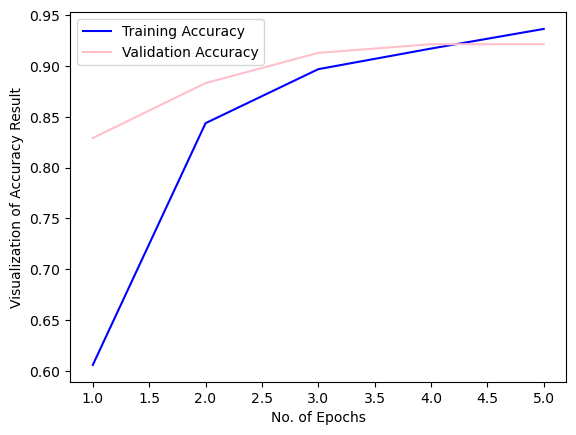

In [40]:
epochs = [i for i in range(1, 6)]
plt.plot(epochs, trianing_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, trianing_history.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Visualization of Accuracy Result")
plt.legend()
plt.show()